In [ ]:
# import librarys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving EURUSD=X.csv to EURUSD=X.csv


In [ ]:
df = pd.read_csv('EURUSD=X.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#set date to be index

df



,Date,Open,High,Low,Close,Adj Close,Volume
2020-02-25,2020-02-25,1.084905,1.088175,1.083177,1.084920,1.084920,0
2020-02-26,2020-02-26,1.088100,1.090358,1.085564,1.088200,1.088200,0
2020-02-27,2020-02-27,1.088566,1.100570,1.088566,1.088589,1.088589,0
2020-02-28,2020-02-28,1.099554,1.105278,1.095158,1.099723,1.099723,0
2020-03-02,2020-03-02,1.105253,1.116408,1.103728,1.105131,1.105131,0
...,...,...,...,...,...,...,...
2021-02-19,2021-02-19,1.209175,1.214772,1.208300,1.209190,1.209190,0
2021-02-22,2021-02-22,1.212445,1.215510,1.209219,1.212636,1.212636,0
2021-02-23,2021-02-23,1.216693,1.217878,1.213681,1.216680,1.216680,0
2021-02-24,2021-02-24,1.215200,1.217404,1.211130,1.215214,1.215214,0


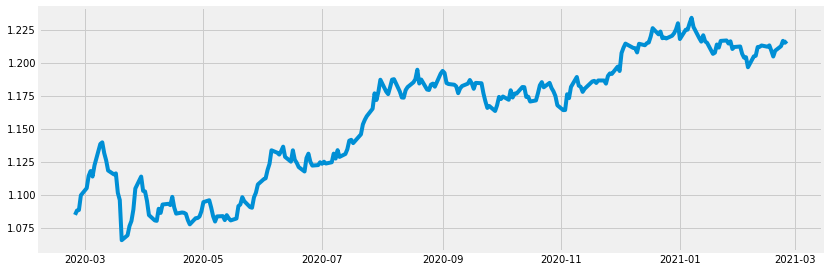

In [ ]:

plt.figure(figsize= (12.5,4.5))
plt.plot(df['Close'], label='Close')
plt.show()

In [ ]:
#calculate the macd and signal line
#calculate the moving averages
fiftyEMA = df.Close.ewm(span=55,adjust=False).mean()
ShortEMA= df.Close.ewm(span=12,adjust=False).mean()
LongEMA= df.Close.ewm(span=26,adjust=False).mean()
#calculate macd line
MACD = ShortEMA -LongEMA
#calculate the signal line
signal = MACD.ewm(span=9, adjust= False).mean()

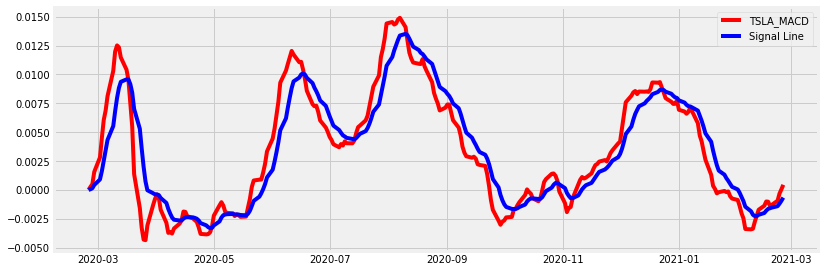

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index, MACD, label= 'TSLA_MACD', color='red' )
plt.plot(df.index,signal, label = 'Signal Line', color='blue')
plt.legend()
plt.show()


In [ ]:
df['MACD'] = MACD
df['Signal'] = signal
df['fiftyEMA'] = fiftyEMA
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal,fiftyEMA
2020-02-25,2020-02-25,1.084905,1.088175,1.083177,1.084920,1.084920,0,0.000000,0.000000,1.084920
2020-02-26,2020-02-26,1.088100,1.090358,1.085564,1.088200,1.088200,0,0.000262,0.000052,1.085037
2020-02-27,2020-02-27,1.088566,1.100570,1.088566,1.088589,1.088589,0,0.000495,0.000141,1.085164
2020-02-28,2020-02-28,1.099554,1.105278,1.095158,1.099723,1.099723,0,0.001560,0.000425,1.085684
2020-03-02,2020-03-02,1.105253,1.116408,1.103728,1.105131,1.105131,0,0.002808,0.000901,1.086378
...,...,...,...,...,...,...,...,...,...,...
2021-02-19,2021-02-19,1.209175,1.214772,1.208300,1.209190,1.209190,0,-0.001293,-0.001533,1.208984
2021-02-22,2021-02-22,1.212445,1.215510,1.209219,1.212636,1.212636,0,-0.000935,-0.001414,1.209114
2021-02-23,2021-02-23,1.216693,1.217878,1.213681,1.216680,1.216680,0,-0.000321,-0.001195,1.209384
2021-02-24,2021-02-24,1.215200,1.217404,1.211130,1.215214,1.215214,0,0.000046,-0.000947,1.209593


In [ ]:
# create function to signal when to buy and selll
def buy_sell(signal):
  Buy =[]
  Sell =[]
  flag = -1
  buy_count = 0
  sell_count = 0
  count_check = buy_count-sell_count
  buy_price =[]
  sell_price=[]
  profit =0
  loss = 0
  plRatio = 0
  #try to include a trailing stop loss
  #try to implement personal strategy on a different notebook
  

#buying
  for i in range(0, len(signal)):
    if signal['MACD'][i] > 0 and signal['MACD'][i-1] < 0:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        buy_count +=1
        flag = 1
        buy_price.append(signal['Close'][i])
      else:
        Buy.append(np.nan)
# sell

    elif signal['Close'][i] < signal['fiftyEMA'][i]  and signal['Close'][i-1] > signal['fiftyEMA'][i-1]:
        Buy.append(np.nan)
        if flag != 0 and flag != -1:
          Sell.append(signal['Close'][i])
          flag =0
          sell_count +=1
          sell_price.append(signal['Close'][i])
        else:
          Sell.append(np.nan)
    else:
        Buy.append(np.nan)
        Sell.append(np.nan)

  for i in range(0, len(sell_price)):
    #profit += (sell_price[i]-buy_price[i])
    if sell_price[i] - buy_price[i]  <= 0:
      loss -= sell_price[i] - buy_price[i]
    elif sell_price[i] - buy_price[i]  > 0:
      profit += sell_price[i] - buy_price[i]
  plRatio = profit*1.0/loss*1.0

  print("count check: ",count_check)
  print("Profit: ",profit)
  print("loss: ", loss)
  print("ratio: ", plRatio)


  return (Buy, Sell )

#create buy and sell columm

In [ ]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_signal_price'] = a[1]

count check:  0
Profit:  0.08506600000000031
loss:  0.02842699999999998
ratio:  2.992436767861553


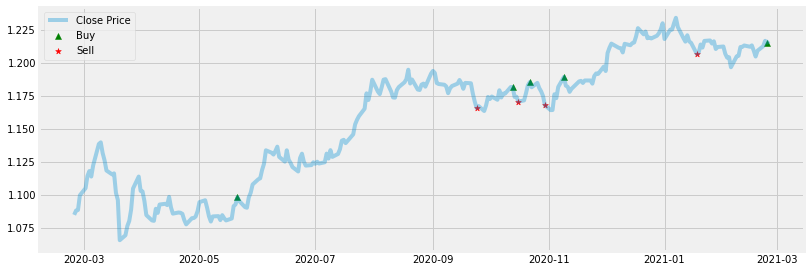

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color ='green', label = 'Buy', marker= '^', alpha = 1)
plt.scatter(df.index, df['Sell_signal_price'], color ='red', label = 'Sell', marker= '*', alpha = 1)
plt.plot(df['Close'], label ='Close Price', alpha = 0.35)
plt.legend()